# Max profit : bruteforce

In [47]:
INPUT_FILE = 'data/actions.csv'

## Load csv

In [48]:
import pandas as pd

df = pd.read_csv(INPUT_FILE)

# Transform percent to float
df['profit'] = df['profit'].apply(lambda x: x / 100)
df['gain'] = df['price'] * df['profit']

df.index +=1

df

,name,price,profit,gain
1,A-1,20,0.05,1.00
2,A-2,30,0.10,3.00
3,A-3,50,0.15,7.50
4,A-4,70,0.20,14.00
5,A-5,60,0.17,10.20
6,A-6,80,0.25,20.00
7,A-7,22,0.07,1.54
8,A-8,26,0.11,2.86
9,A-9,48,0.13,6.24
10,A-10,34,0.27,9.18


Make a list of 20 tuples (action, cout action, gain action)

In [49]:
# Make a list of 20 tuples (action, cout action, gain action) prior to compute all combinations
actions_cost_profit = []

# Iterate over each row
for index, rows in df.iterrows():  # n steps -> O(n)
    actions_cost_profit.append((rows.name, rows.price, rows.gain))  # method append: O(1)

**Time complexity to get the list of actions : O(n)**

## Get all possible combinations

In [50]:
def get_combos(actions):
    """
    Recursive function to get all actions combinations
    :param actions: list of actions (tuples: 'action_name', cost, profit)
    :return: all actions combination
    """

    if not actions:
        # BASE CASE
        return [[]]

    # RECURSIVE CASE
    combos = []
    head = [actions[0]]
    tail = actions[1:]

    tail_combos = get_combos(tail)
    for t in tail_combos:
        combos.append(head + t)

    combos = combos + tail_combos
    return combos

### Time complexity of get_combos

3 tests :
* dataset actions1.csv (20 actions) : time 0.4157
* dataset actions2.csv (40 actions) : time 0.4201
* dataset actions3.csv (80 actions) : time 0.4236

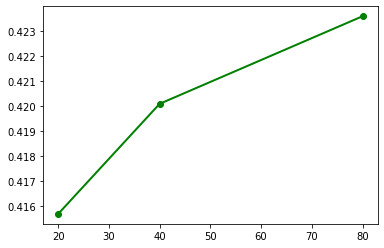

In [51]:
import matplotlib.pyplot as plt
plt.plot([20, 40, 80], [0.4157, 0.4201, 0.4236], color='green', marker='o', linewidth=2)

The get_combos function has a complexity of **O(log n)**.<br>

## Get ROI

In [52]:
def roi(combos):
    """
    Function that computes cost and profit for each combination and append it to combination
    :param combos: list of all combinations (each combination is a list of tuples: action_name, cost, profit)
    :return: generator
    """

    for combo in combos:  # steps = c = nb combos
        cost = 0
        profit = 0

        for action in combo:  # steps = n = nb actions
            cost += action[1]
            profit += action[2]

        combo.append(cost)  # method append() : O(1)
        combo.append(profit)

        yield combo

### Time complexity of roi
The roi function has a time complexity of O(nc)<br>
As c = 2<sup>n</sup>, the roi function has a time complexity of O(n2<sup>n</sup>), or **O(2<sup>n</sup>)**

## Get max profit for cost <= 500

In [53]:
def best_combo(max_cost):
    all_combos = []
    for comb in roi(get_combos(actions_cost_profit)):  # steps = nomb combos
        *actions, cost, profit = comb
        if cost > max_cost:
            continue
        all_combos.append([[*actions], cost, profit])  # method append(): O(1)
    best = max(all_combos, key=lambda sublist: sublist[2])  # max: O(n)

    best_comb_ = [i[0] for i in best[0]]
    min_cost_ = best[1]
    max_profit_ = best[2]

    return best_comb_, min_cost_, max_profit_


best_comb, min_cost, max_profit = best_combo(500)

print(f"Meilleure combinaison : {best_comb} \n"
      f"Cout: {min_cost} \n"
      f"Gain: {max_profit}")

Meilleure combinaison : [4, 5, 6, 8, 10, 11, 13, 18, 19, 20] 
Cout: 498 
Gain: 99.08000000000001


### Time complexity of best_combo
The best_combo function has a time complexity of **O(n)**

### Total complexity : O(2<sup>n</sup>)
Time will increase exponentially as data grows